In [1]:
import tensorflow as tf

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from preprocess_mini02 import *
import preprocess_mini02
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정

plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = 12, 12
sns.set(font="Malgun Gothic",  #"NanumGothicCoding",
        rc={"axes.unicode_minus": False},  # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [5]:
air = pd.read_csv('air_2021.csv', index_col=0)
weather = pd.read_csv('weather_2021.csv', encoding='cp949')

trans_datetime(air)

fill_weather(weather)

temp = pd.DataFrame(
    data=[['서울 종로구', '도시대기', '111123', '종로구', 2021010100, .003, .5, .024, .015, 26, 14, '서울 종로구 종로35가길 19']],
    columns=['지역', '망', '측정소코드', '측정소명', '일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '주소'])

trans_datetime(temp)
air = pd.concat([temp, air]).sort_values(by='일시').reset_index(drop=True)

# ['지역', '망', '측정소코드', '측정소명', '주소'] 제거
preprocess_mini02.__drop_columns(air, 'air')

In [6]:
air.sort_values('일시')

,일시,SO2,CO,O3,NO2,PM10,PM25
0,2021-01-01 00:00:00,0.003,0.5,0.024,0.015,26.0,14.0
1,2021-01-01 01:00:00,0.002,0.5,0.022,0.016,24.0,14.0
2,2021-01-01 02:00:00,0.002,0.6,0.018,0.020,25.0,14.0
3,2021-01-01 03:00:00,0.002,0.6,0.013,0.025,27.0,16.0
4,2021-01-01 04:00:00,0.003,0.6,0.011,0.027,23.0,13.0
...,...,...,...,...,...,...,...
8756,2021-12-31 20:00:00,0.003,0.4,0.025,0.020,26.0,8.0
8757,2021-12-31 21:00:00,0.003,0.4,0.030,0.014,27.0,9.0
8758,2021-12-31 22:00:00,0.003,0.4,0.033,0.011,20.0,8.0
8759,2021-12-31 23:00:00,0.003,0.4,0.029,0.015,20.0,9.0


In [7]:
df = pd.merge(air, weather, how='inner', left_on='일시', right_on='일시')

In [8]:
df.head()

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,운형(Ci),운형(Cc),운형(Cs),운형(Ac),운형(As),운형(Ns),운형(Sc),운형(St),운형(Cu),운형(Cb)
0,2021-01-01 01:00:00,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 02:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-9.1,0.0,1.6,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 03:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.3,0.0,1.1,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 04:00:00,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,0.3,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 05:00:00,0.003,0.6,0.008,0.032,24.0,14.0,-9.7,0.0,1.9,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   일시             8759 non-null   datetime64[ns]
 1   SO2            8647 non-null   float64       
 2   CO             8679 non-null   float64       
 3   O3             8662 non-null   float64       
 4   NO2            8679 non-null   float64       
 5   PM10           8654 non-null   float64       
 6   PM25           8662 non-null   float64       
 7   기온(°C)         8759 non-null   float64       
 8   강수량(mm)        8759 non-null   float64       
 9   풍속(m/s)        8759 non-null   float64       
 10  풍향(16방위)       8759 non-null   float64       
 11  습도(%)          8759 non-null   int64         
 12  증기압(hPa)       8759 non-null   float64       
 13  이슬점온도(°C)      8759 non-null   float64       
 14  현지기압(hPa)      8759 non-null   float64       
 15  해면기압(hPa)      8759 n

In [10]:
from xgboost import *

XGBRFRegressor(tree_method='gpu_hist', gpu_id=0)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=None, gpu_id=0, grow_policy=None,
               importance_type=None, interaction_constraints=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               predictor=None, random_state=None, reg_alpha=None,
               sampling_method=None, scale_pos_weight=None, ...)

In [11]:
from datetime import datetime

df['일시'] = df['일시'].apply(lambda x: datetime.strftime(x, format="%Y%m%d%H"))

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.model_selection import *
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from xgboost import *

In [50]:
def search_air_values(df):
    X = df.drop(columns=['PM10', 'PM25'], axis=1)
    y = df.loc[:, ['PM10', 'PM25']]

    X = df.copy()

    model = IterativeImputer(
        estimator=XGBRFRegressor(learning_rate=0.02,
                                 tree_method='gpu_hist',
                                 colsample_bynode=.8,
                                 objective='reg:squarederror',
                                 max_depth=8, gpu_id=0),
        max_iter=20,
        verbose=3,
        imputation_order='ascending',
    )

    data = pd.DataFrame(model.fit_transform(X))
    data.columns = X.columns
    # data = pd.concat([t, data], axis=1)

    return data, model

In [51]:
def search_air_value_knn(df):
    X = df.drop(columns=['PM10', 'PM25'], axis=1)
    y = df.loc[:, ['PM10', 'PM25']]

    X = df.copy()
    # 스케일링을 사용할 시 아황산가스(SO2)나 오존(O3)의 농도의 max값이 0.5까지 올라가는 이상치가 발생하여 적용X

    model = KNNImputer(n_neighbors=5, weights='distance', )
    data = pd.DataFrame(model.fit_transform(X))
    data.columns = X.columns
    # data = pd.concat([data, y], aixs=1)

    return data, model

In [52]:
result, model = search_air_values(df)

[IterativeImputer] Completing matrix with shape (8759, 51)
[IterativeImputer] Ending imputation round 1/20, elapsed time 72.40
[IterativeImputer] Change: 58.72883970180672, scaled tolerance: 2021123.1230000001 
[IterativeImputer] Early stopping criterion reached.


In [53]:
knn_result, knn_model = search_air_value_knn(df)

In [54]:
air.loc[air.SO2.isna(), 'SO2':]

,SO2,CO,O3,NO2,PM10,PM25
108,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,NaN,NaN,NaN,NaN,NaN
640,NaN,NaN,NaN,NaN,NaN,NaN
1116,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
8080,NaN,NaN,NaN,NaN,NaN,NaN
8081,NaN,NaN,NaN,NaN,NaN,NaN
8082,NaN,NaN,NaN,NaN,NaN,NaN
8388,NaN,NaN,NaN,NaN,118.0,86.0


In [55]:
knn_result.head()

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,운형(Ci),운형(Cc),운형(Cs),운형(Ac),운형(As),운형(Ns),운형(Sc),운형(St),운형(Cu),운형(Cb)
0,2.021010e+09,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.021010e+09,0.002,0.6,0.018,0.020,25.0,14.0,-9.1,0.0,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.021010e+09,0.002,0.6,0.013,0.025,27.0,16.0,-9.3,0.0,1.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.021010e+09,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.021010e+09,0.003,0.6,0.008,0.032,24.0,14.0,-9.7,0.0,1.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
knn_result.loc[:, "SO2":"PM25"].describe()

,SO2,CO,O3,NO2,PM10,PM25
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,0.003384,0.504902,0.029280,0.023287,38.772125,20.394325
std,0.000824,0.208931,0.019659,0.014422,47.253565,16.522454
min,0.001000,0.200000,0.000000,0.003000,3.000000,1.000000
25%,0.003000,0.400000,0.015000,0.012000,18.000000,10.000000
50%,0.003000,0.400000,0.028000,0.019000,30.000000,16.000000
75%,0.004000,0.600000,0.040000,0.031000,46.000000,25.000000
max,0.011000,2.000000,0.137000,0.082000,942.000000,154.000000


In [43]:
air.loc[:, "SO2":"PM25"].describe()

,SO2,CO,O3,NO2,PM10,PM25
count,8649.000000,8681.000000,8664.000000,8681.000000,8656.000000,8664.000000
mean,0.003385,0.505645,0.029246,0.023345,38.923868,20.465259
std,0.000826,0.209504,0.019707,0.014455,47.468038,16.564105
min,0.001000,0.200000,0.000000,0.003000,3.000000,1.000000
25%,0.003000,0.400000,0.015000,0.012000,18.000000,10.000000
50%,0.003000,0.400000,0.028000,0.019000,30.000000,16.000000
75%,0.004000,0.600000,0.040000,0.031000,46.000000,25.000000
max,0.011000,2.000000,0.137000,0.082000,942.000000,154.000000


In [44]:
result.loc[:, "SO2":"PM25"].describe()

KeyError: "Cannot get left slice bound for non-unique label: 'SO2'"

In [45]:
air.head()

,지역,망,측정소코드,측정소명,일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021-01-01 00:00:00,0.003,0.5,0.024,0.015,26.0,14.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021-01-01 01:00:00,0.002,0.5,0.022,0.016,24.0,14.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021-01-01 02:00:00,0.002,0.6,0.018,0.020,25.0,14.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021-01-01 03:00:00,0.002,0.6,0.013,0.025,27.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021-01-01 04:00:00,0.003,0.6,0.011,0.027,23.0,13.0,서울 종로구 종로35가길 19


In [27]:
drop_columns_weather = ['지점', '지점명']
drop_columns_air = ['지역', '망', '측정소코드', '측정소명', '주소']

In [28]:
air.isna().sum()

일시        0
SO2     112
CO       80
O3       97
NO2      80
PM10    105
PM25     97
dtype: int64

In [59]:
df

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,운형(Ci),운형(Cc),운형(Cs),운형(Ac),운형(As),운형(Ns),운형(Sc),운형(St),운형(Cu),운형(Cb)
0,2021010101,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,...,0,0,0,0,0,0,0,0,0,0
1,2021010102,0.002,0.6,0.018,0.020,25.0,14.0,-9.1,0.0,1.6,...,0,0,0,0,0,0,0,0,0,0
2,2021010103,0.002,0.6,0.013,0.025,27.0,16.0,-9.3,0.0,1.1,...,0,0,0,0,0,0,0,0,0,0
3,2021010104,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,0.3,...,0,0,0,0,0,0,0,0,0,0
4,2021010105,0.003,0.6,0.008,0.032,24.0,14.0,-9.7,0.0,1.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2021123119,0.003,0.4,0.026,0.019,25.0,10.0,-6.4,0.0,2.2,...,0,0,0,0,0,0,0,0,0,0
8755,2021123120,0.003,0.4,0.025,0.020,26.0,8.0,-6.3,0.0,4.1,...,0,0,0,0,0,0,0,0,0,0
8756,2021123121,0.003,0.4,0.030,0.014,27.0,9.0,-6.7,0.0,4.8,...,0,0,0,0,0,0,0,0,0,0
8757,2021123122,0.003,0.4,0.033,0.011,20.0,8.0,-7.5,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0


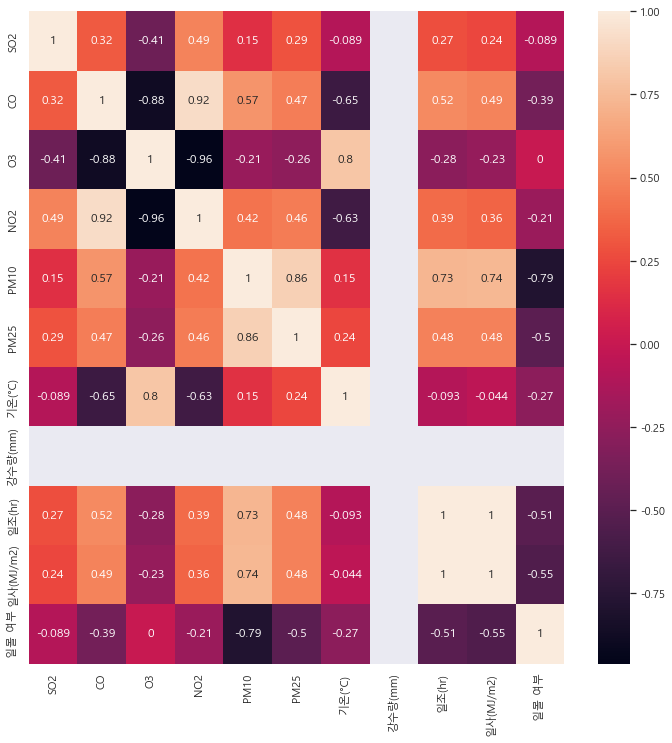

In [42]:

sns.heatmap(df.iloc[[1, 2, 3, 4, 5, 6, 7, 8, 17, 18], [1, 2, 3, 4, 5, 6, 7, 8, 16, 17, 18]].corr(), annot=True)
plt.show()

In [60]:
trans_datetime(df)

ParserError: year 2021010101 is out of range: 2021010101

In [61]:
df

,일시,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,운형(Ci),운형(Cc),운형(Cs),운형(Ac),운형(As),운형(Ns),운형(Sc),운형(St),운형(Cu),운형(Cb)
0,2021010101,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,...,0,0,0,0,0,0,0,0,0,0
1,2021010102,0.002,0.6,0.018,0.020,25.0,14.0,-9.1,0.0,1.6,...,0,0,0,0,0,0,0,0,0,0
2,2021010103,0.002,0.6,0.013,0.025,27.0,16.0,-9.3,0.0,1.1,...,0,0,0,0,0,0,0,0,0,0
3,2021010104,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,0.0,0.3,...,0,0,0,0,0,0,0,0,0,0
4,2021010105,0.003,0.6,0.008,0.032,24.0,14.0,-9.7,0.0,1.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2021123119,0.003,0.4,0.026,0.019,25.0,10.0,-6.4,0.0,2.2,...,0,0,0,0,0,0,0,0,0,0
8755,2021123120,0.003,0.4,0.025,0.020,26.0,8.0,-6.3,0.0,4.1,...,0,0,0,0,0,0,0,0,0,0
8756,2021123121,0.003,0.4,0.030,0.014,27.0,9.0,-6.7,0.0,4.8,...,0,0,0,0,0,0,0,0,0,0
8757,2021123122,0.003,0.4,0.033,0.011,20.0,8.0,-7.5,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
